# Python Pandas Tutorial: A complete introduction for beginners

[Link to post](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

[Link to GitHub](https://github.com/LearnDataSci/article-resources/tree/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners)

> Pandas is derived form the term "Panel Data, an econometrics term for data sets that include observations over multiple time periods for the same individuals.

### What is pandas for?

Through pandas, you can ger acquainted with your data by cleaning, transforming and analyze it.

First step is to understant the nature of data sets.

### How does pandas fit into the data science toolkit?

Pandas library is a central components of the data science toolkit but it is used in conjunctin with other libraries in the collection.<br><br>
Pandas build on top of the **Numpy** package, meaning a lot of structure of NumPy is used or replicated in Pandas. Data in Pandas is often used to feed statistical analysis in **SciPy**, plotting functions for **Matplotlib**, and machine learing algorithms in **Scikit-learn**.<br><br>
Jupyter Notebooks offer a good environment for using pandas to do data exploration and modeling, but pandas can also be used in text editors just as easily.<br><br>
Jupyter Notebooks give us the ability to execute code in a particular cell as opposed to running the entire file.

### Core components of pandas: Series and DataFrames

> A **series** is essientially a columns and a **DataFrame** is a multi-dimensional table made up of a collection of Series.

![Image](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

### Creating dataframe from scratch

Creating DataFrame right in Python is good to know and quite useful when testing new methods and functions you find in the pandas docs.

Let create a DataFrame using **dict**.

In [3]:
data = {
    'apple' : [3, 2, 0, 1],
    'orange' : [0, 3, 7, 2]
}

Pandas DataFrame constructor : 

In [5]:
import pandas as pd
purchases = pd.DataFrame(data)
purchases

,apple,orange
0,3,0
1,2,3
2,0,7
3,1,2


Each **(Key, value)** item in data corresponds to a columns in the resulting DataFrame.

We can create our own index instead of 0-3 in DataFrame initializatin:

In [6]:
purchases = pd.DataFrame(data, index = ['June', 'Robert', 'Lily', 'David'])
purchases

,apple,orange
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Saving to csv file using **to_csv** :

In [10]:
purchases.to_csv('purchases.csv')

We can **loc**ate a customer order by using their name :

In [7]:
purchases.loc['June']

apple     3
orange    0
Name: June, dtype: int64

### How to read a data

Reading data form csv :

In [12]:
df = pd.read_csv('purchases.csv')
df

,Unnamed: 0,apple,orange
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Lets designate the **index_col** when reading :

In [13]:
df = pd.read_csv('purchases.csv', index_col = 0)
df

,apple,orange
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Reading data form JSON

In [16]:
purchases.to_json('purchases.json')

if you have a JSON file - which is essentially a stored Python dict

In [17]:
df = pd.read_json('purchases.json')
df

,apple,orange
David,1,2
June,3,0
Lily,0,7
Robert,2,3


### Reading data from SQL Database

If you are working with data from a SQL database you need to first establish a connection using an appropriate Python Library, then pass a query to pandas. Here we'll use SQLite to demonstrate. 

In [19]:
# importe library
import sqlite3

In [20]:
# connecting to database as con
con = sqlite3.connect("database.db")

In this SQLitea database we have a table called *purchases*, our index is in a column called "index".<br>
By passing a SELECT query and our **con**, we can read from purchases table.

In [32]:
df = pd.read_sql_query("SELECT * FROM purchases", con)
df

,index,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


In [33]:
# Setting index

df = df.set_index('index')

df

,apples,oranges
index,,
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Converting back to a CSV, JSON or SQL

In [ ]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')

df.to_sql('new_purchases', con)

When we save JSON and CSV files, all we have to input into those functions is our desired filename with the appropriate file extension. With SQL, we're not creating a new file but instead inserting a new table into the database using our con variable from before.

### DataFrame operations

You should know the operatins that perform simple transformations of your data and those that provide fundamental statistical analysis.

In [34]:
# loading imdb csv data

movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col = 'Title')

In [35]:
# head() output the first five rows of your DataFrame but can also pass number as well i.e movies_df.head(10)
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [36]:
# Similarly we can do tail to show last rows 

movies_df.tail()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


#### Getting information about yout data

**.info()** should be the very first commands you run after loading your data:

In [37]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


**.shape()** which will outputs just a tuple of (rows, columns) :

In [38]:
movies_df.shape

(1000, 11)

Note that .shape has no parentheses and is a simple tuple of format(rows, columns). So we have 1000 rows and 11 columns in our movies DataFrame.

You will be going to .shape a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were reoved.

#### Handling duplicates

for demonstration, lets simply double the movies DataFrame by appending itself :

In [39]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

Notice call .shape quickly proves our DataFrame rows have doubled.

We can now try dropping duplicates

In [40]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

Calling .shape as comformatin cus we are back to (1000, 11)

To Keep assiging DataFrames to the same variable like temp_df in our example. For this pandas has the **inplace** keyword argument.

In [42]:
temp_df.drop_duplicates(inplace=True)
# now the temp_df will have the transformed data automatically

Another important argument for drop_duplicates() is **keep**, which has three possile options:

- **first**: (default) Drop duplicate except the first occurrence.
- **last**: Drop duplicate except for the last occurrence.
- **False**: Drop all duplicates.

In [43]:
temp_df = movies_df.append(movies_df)

temp_df .drop_duplicates(inplace = True, keep = False)

temp_df.shape

(0, 11)

Since all the rows were duplicate, keep = False dropped them all resulting in zero rows being left over.

#### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

In [44]:
# Print the columns names of our dataset :

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

We can use **.rename()** method to rename certain or all columns via dict.

In [45]:
movies_df.rename(columns = {
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
}, inplace = True)

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

If we want to lowercase all names, we instead of using .rename() we can set a list of names like so :

In [47]:
movies_df.columns =['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore']

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Thats too much work, instead we can do list comprehension.<br>
First we turn back the dataset coulmns names

In [50]:
movies_df.columns =['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore']

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [49]:
movies_df.columns = [col.lower() for col in movies_df]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [57]:
# Replacing space with underscores
# df.replace(' ', '_', regex=True)

# Replacing columns name space with undersocres
movies_df.columns = movies_df.columns.str.replace(' ', '_')

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenuemillions', 'Metascore'],
      dtype='object')

#### How to work with missing values

There are two options in dealing with nulls:
    - Get rid of rows or columns with nulls
    - Replace nulls with non-null values, a techinque known as **imputaion**

In [59]:
# Calculating total number of nulls in each columns using isnull() :

movies_df.isnull().head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False


**isnull()** returns a DataFrame where each cell is either True or False depending on that cell's null status

In [60]:
# To count the numbet of nulls in each coulumns we use an aggreate function for summing :

movies_df.isnull().sum()

Rank                 0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenuemillions    128
Metascore           64
dtype: int64

Data Scientists and Analysts regularly face the delemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

In [61]:
# Remving null using dropna() :

# Uncomment below to execute it
# movies_df.dropna()

# In our case removing all null seems like a waste since there's perfectly good data in the other columns of those dropped rows.

Other then just droping rows, you can also drop columns with null values by setting **axis = 1** :

In [62]:
# Uncomment below to execute it
# movies_df.dropna(axis = 1)

# in our dataset, this operation would drop revenue_millions and metascore columns

Imputation<br>
Imputation is a conventional feature enineering technique used to keep valuable dat that have null values.<br>
Instead of removing the every row having null, we can impute that null with other value, usually the mean or the median of that columns.<br>

In [67]:
# Let impute the missing values in the revenue_millions columns.

revenue = movies_df['Revenuemillions']

revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenuemillions, dtype: float64

In [68]:
# Impute the missing values of revenue using the mean :

revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

In [70]:
# Filling th revenue null value with mean using fillna():

revenue.fillna(revenue_mean, inplace = True)

In [71]:
# check

movies_df.isnull().sum()

Rank                0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime             0
Rating              0
Votes               0
Revenuemillions     0
Metascore          64
dtype: int64

Understanding your variables <br>
Using **describe()** on an entire DataFrame we can get a summary of the distribution of continuous variable :

In [72]:
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


describe() can also be used on a categorical variable to get the count or rows, unique count of categories, top category, and freq of top category :

In [74]:
movies_df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

**.value_counts()** can tell us the frequency of all values in a columns :

In [77]:
movies_df['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

Relation between continuous variables <br>
By using the correlation method **.corr()** we can generate the relationship between each continuous variable :

In [78]:
movies_df.corr()

,Rank,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenuemillions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset. <br>
Positive number indicate a positive correlation - one goes up the other goes up <br>
Negative number indicate a negative correlation - one goes up the other goes down <br>
and Value 1 for perfect correlation.

**DataFrame slicing, selecting, extracting**

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors.

In [79]:
genre_col = movies_df['Genre']

type(genre_col)

pandas.core.series.Series

In [80]:
# To extract columns as DataFrame, you need to pass list columns names.

genre_col = movies_df[['Genre']]

type(genre_col)

pandas.core.frame.DataFrame

In [82]:
# Since it's jast a list, adding another columns name is easy

subset = movies_df[['Genre', 'Rating']]

subset.head()

,Genre,Rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


Getting data by rows<br>
By rows :<br>
     1 **.loc** - **Loc**ate by name <br>
     2 **.iloc** - **Loc**ate by numerical **i**ndex<br>

In [83]:
# Remember that we are still indexed by movies Title, so to use .lic we give it the title of a movie :

prom = movies_df.loc['Prometheus']

prom

Rank                                                               2
Genre                                       Adventure,Mystery,Sci-Fi
Description        Following clues to the origin of mankind, a te...
Director                                                Ridley Scott
Actors             Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                            2012
Runtime                                                          124
Rating                                                             7
Votes                                                         485820
Revenuemillions                                               126.46
Metascore                                                         65
Name: Prometheus, dtype: object

In python , just slice with brackets like example_list[1:4]. It's works the same way in pandas

In [84]:
movie_subset = movies_df.loc['Prometheus' : 'Sing']

movie_subset

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [96]:
movie_subset = movies_df.iloc[1 : 4]

movie_subset

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


Conditional Selections

In [101]:
condition = (movies_df['Director'] == 'Ridley Scott')

condition.head()

Title
Guardians of the Galaxy    False
Prometheus                 False
Split                      False
Sing                       False
Suicide Squad              False
Name: Director, dtype: bool

In [107]:
movies_df[movies_df['Director'] == 'Ridley Scott']

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


You can get used to looking at it these conditionals by reading it line <br>
**Select** mocies_df **where** movies_df **director equals Ridley Scott**

In [111]:
# Filtering DataFrame by ratings :

movies_df[movies_df['Rating'] >= 8.6].head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


Logical operators **|** for "or" and **&** for "and"

In [112]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') | (movies_df['Director'] == 'Ridley Scott')].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Using the **isin()** method we could make this more concise though:

In [114]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [116]:
# Movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue

movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
    & (movies_df['Revenuemillions'] < movies_df['Revenuemillions'].quantile(0.25))
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


#### Applying Functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.<br>

An efficient alternative is to **apply()** a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

In [117]:
def rating_function(x):
    if x>=8.0:
        return "good"
    else:
        return "bad"

In [119]:
# Now we want to send the entire rating column through this function, which is what apply() does:

movies_df['Rating_category'] = movies_df['Rating'].apply(rating_function)

movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore,Rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


In [120]:
# lambda functin to achive same result as:

movies_df['rating_category'] = movies_df['Rating'].apply(lambda x: 'good' if x >= 8.0 else 'bad' )

movies_df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenuemillions,Metascore,Rating_category,rating_category
Title,,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad,bad


### Brief Plotting

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size' : 20, 'figure.figsize' : (10, 8)})

>Plotting Tips
- for categorical variable utilize Bar Chart and Boxplots
- for continuous variable utilize Histogramsm, Scatterplots, Line graphs and Boxplots

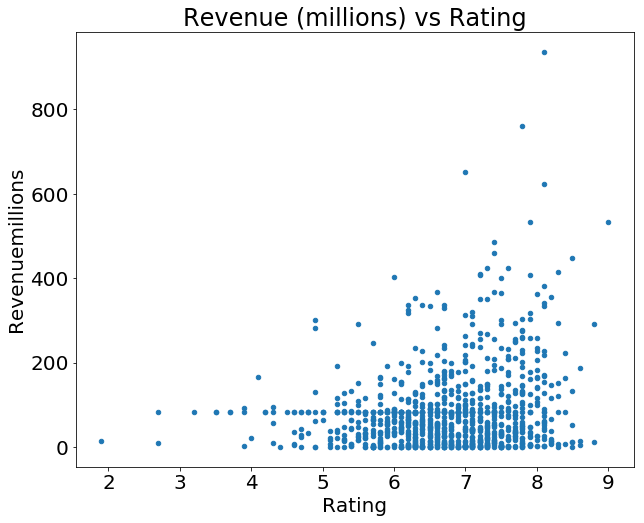

In [128]:
# Lets plot relationshop between ratings and revenue

movies_df.plot(kind= 'scatter',x = 'Rating', y ='Revenuemillions', title='Revenue (millions) vs Rating') #; 
#; will hide the "<matplotlib.axes._subplots.AxesSubplot at 0x11daa9390>" message in jupyter notebook

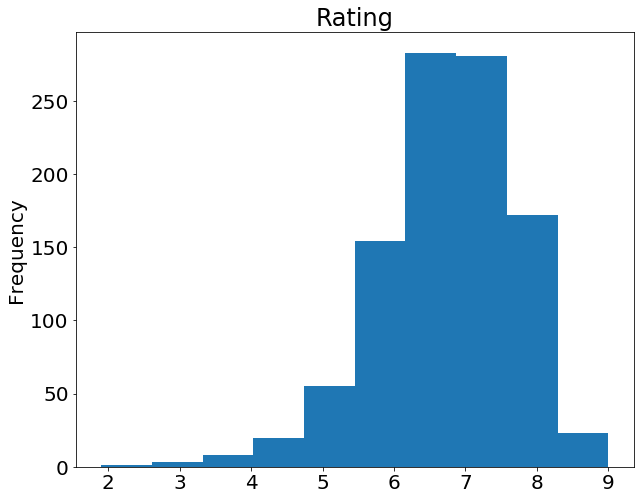

In [130]:
movies_df['Rating'].plot(kind='hist', title = 'Rating');

In [131]:
movies_df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

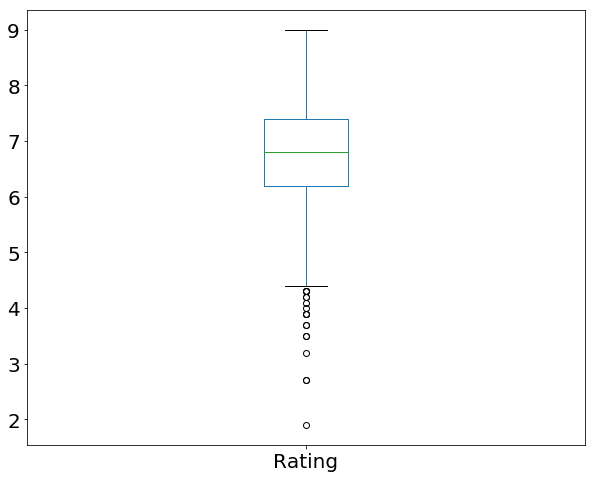

In [133]:
# visualize this using boxplot

movies_df['Rating'].plot(kind = 'box');

![image](https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif)

By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

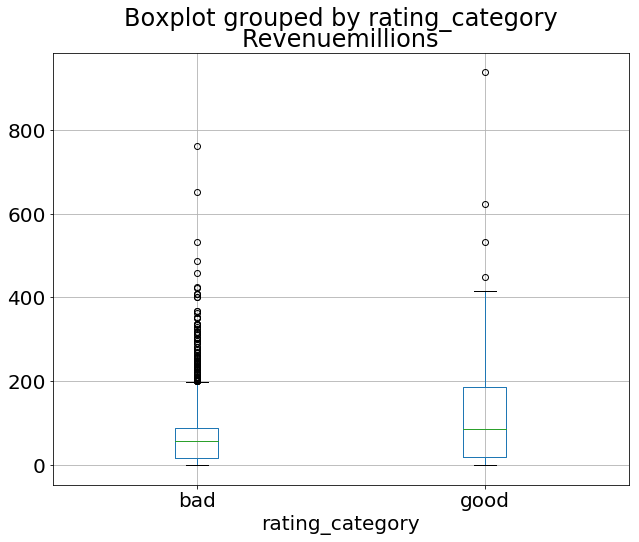

In [137]:
movies_df.boxplot(column='Revenuemillions', by='rating_category');

#### Conclusion

>Exploring, cleaning, transforming, and visualization data with pandas in Python is an essential skill in data science. Just cleaning wrangling data is 80% of your job as a Data Scientist. After a few projects and some practice, you should be very comfortable with most of the basics.